In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
heart = pd.read_csv(r"C:\Users\Nikita\Downloads\Telegram Desktop\HeartDisease.csv")

In [3]:
heart.head(10)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
heart.shape

(303, 14)

In [5]:
heart.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [6]:
heart.dtypes.value_counts()

int64      13
float64     1
dtype: int64

In [7]:
heart.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

# Outlier Treatment 

<AxesSubplot:>

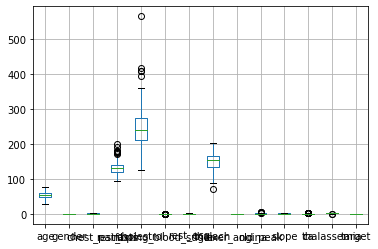

In [8]:
heart.boxplot()

In [9]:
basicstats=heart.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.1,0.25,0.50,0.75,0.9,0.95,0.96,0.97,0.98,0.99]).T #t = transpose 

In [10]:
basicstats

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
age,303.0,54.366337,9.082101,29.0,35.00,35.08,38.00,39.00,39.1,42.0,47.5,55.0,61.0,66.0,68.0,68.920,69.94,70.00,71.00,77.0
gender,303.0,0.683168,0.466011,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000,1.00,1.00,1.00,1.0
chest_pain,303.0,0.966997,1.032052,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.000,3.00,3.00,3.00,3.0
rest_bps,303.0,131.623762,17.538143,94.0,100.00,101.04,104.06,105.08,108.0,110.0,120.0,130.0,140.0,152.0,160.0,169.600,170.00,177.84,180.00,200.0
cholestrol,303.0,246.264026,51.830751,126.0,149.00,160.16,167.06,172.16,175.0,188.0,211.0,240.0,274.5,308.8,326.9,334.600,340.94,353.96,406.74,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000,1.00,1.00,1.00,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000,1.00,1.00,1.98,2.0
thalach,303.0,149.646865,22.905161,71.0,95.02,97.08,103.12,105.08,108.1,116.0,133.5,153.0,166.0,176.6,181.9,182.000,184.94,186.96,191.96,202.0
exer_angina,303.0,0.326733,0.469794,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.000,1.00,1.00,1.00,1.0
old_peak,303.0,1.039604,1.161075,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.8,1.6,2.8,3.4,3.592,3.60,4.00,4.20,6.2


In [11]:
heart["cholestrol"]=np.where(heart["cholestrol"]>=406.74,406.74,heart["cholestrol"])

In [12]:
heart["cholestrol"]=np.where(heart["cholestrol"]<=149.00,149.00,heart["cholestrol"])

In [13]:
heart["thalach"]=np.where(heart["thalach"]<=95.02,95.02,heart["thalach"])

In [14]:
heart["old_peak"]=np.where(heart["old_peak"]>=4.20,4.20,heart["old_peak"])

In [15]:
basicstats1=heart.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.1,0.25,0.50,0.75,0.9,0.95,0.96,0.97,0.98,0.99]).T #t = transpose 

In [16]:
basicstats1

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
age,303.0,54.366337,9.082101,29.00,35.0000,35.08,38.00,39.00,39.1,42.0,47.5,55.0,61.0,66.0,68.0,68.920,69.94,70.00,71.0000,77.00
gender,303.0,0.683168,0.466011,0.00,0.0000,0.00,0.00,0.00,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000,1.00,1.00,1.0000,1.00
chest_pain,303.0,0.966997,1.032052,0.00,0.0000,0.00,0.00,0.00,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.000,3.00,3.00,3.0000,3.00
rest_bps,303.0,131.623762,17.538143,94.00,100.0000,101.04,104.06,105.08,108.0,110.0,120.0,130.0,140.0,152.0,160.0,169.600,170.00,177.84,180.0000,200.00
cholestrol,303.0,245.864554,48.874343,149.00,149.0000,160.16,167.06,172.16,175.0,188.0,211.0,240.0,274.5,308.8,326.9,334.600,340.94,353.96,406.4852,406.74
fasting_blood_sugar,303.0,0.148515,0.356198,0.00,0.0000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000,1.00,1.00,1.0000,1.00
rest_ecg,303.0,0.528053,0.525860,0.00,0.0000,0.00,0.00,0.00,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000,1.00,1.00,1.9800,2.00
thalach,303.0,149.765941,22.570390,95.02,95.0396,97.08,103.12,105.08,108.1,116.0,133.5,153.0,166.0,176.6,181.9,182.000,184.94,186.96,191.9600,202.00
exer_angina,303.0,0.326733,0.469794,0.00,0.0000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.000,1.00,1.00,1.0000,1.00
old_peak,303.0,1.027723,1.119258,0.00,0.0000,0.00,0.00,0.00,0.0,0.0,0.0,0.8,1.6,2.8,3.4,3.592,3.60,4.00,4.2000,4.20


# EDA

C:\Users\Nikita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

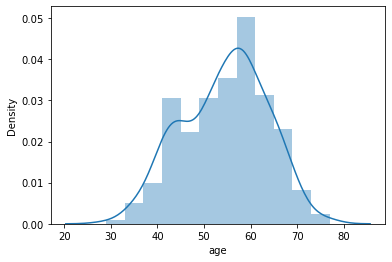

In [17]:
sns.distplot(heart['age'])

<function matplotlib.pyplot.show(close=None, block=None)>

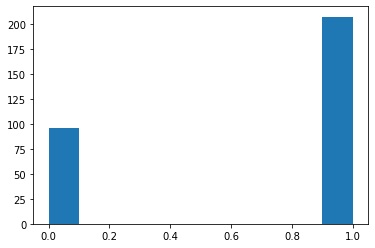

In [18]:
plt.hist(heart['gender'])
plt.show

C:\Users\Nikita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cholestrol', ylabel='Density'>

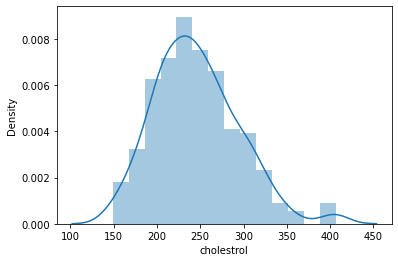

In [19]:
sns.distplot(heart['cholestrol'])

<AxesSubplot:>

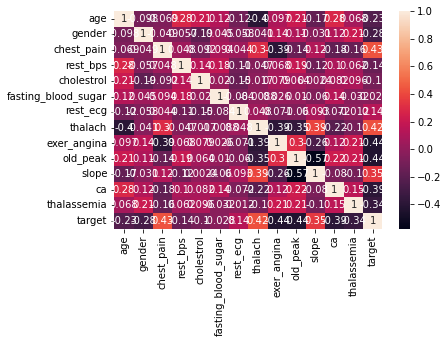

In [20]:
sns.heatmap(heart.corr(),annot= True)

In [21]:
y = heart['target']
x = heart.drop(['target'],axis=1)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=5)


In [23]:
x_train

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
292,58,0,0,170,225.0,1,0,146.0,1,2.8,1,2,1
6,56,0,1,140,294.0,0,0,153.0,0,1.3,1,0,2
102,63,0,1,140,195.0,0,1,179.0,0,0.0,2,2,2
123,54,0,2,108,267.0,0,0,167.0,0,0.0,2,0,2
131,49,0,1,134,271.0,0,1,162.0,0,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,52,1,2,172,199.0,1,1,162.0,0,0.5,2,0,3
73,51,1,0,140,261.0,0,0,186.0,1,0.0,2,0,2
118,46,0,1,105,204.0,0,1,172.0,0,0.0,2,0,2
189,41,1,0,110,172.0,0,0,158.0,0,0.0,2,0,3


In [24]:
dt=DecisionTreeClassifier()

In [25]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
print(f"Training Score:{dt.score(x_train,y_train)}")
print(f"Testing Score:{dt.score(x_test,y_test)}")

Training Score:1.0
Testing Score:0.7763157894736842


In [27]:
pred_train=dt.predict(x_train)
pred_test=dt.predict(x_test)

In [28]:
dt2=DecisionTreeClassifier(max_depth=9)
dt2.fit(x_train, y_train)
print("Train score :", dt2.score(x_train, y_train))
print("Test score :", dt2.score(x_test, y_test))

Train score : 0.9955947136563876
Test score : 0.7631578947368421


In [29]:
dt2=DecisionTreeClassifier(min_samples_leaf=15)
dt2.fit(x_train, y_train)
print("Train score :", dt2.score(x_train, y_train))
print("Test score :", dt2.score(x_test, y_test))

Train score : 0.8325991189427313
Test score : 0.881578947368421


In [30]:
dt2=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=100, min_samples_leaf=15)
dt2.fit(x_train, y_train)
print("Train score :", dt2.score(x_train, y_train))
print("Test score :", dt2.score(x_test, y_test))

Train score : 0.7665198237885462
Test score : 0.7631578947368421


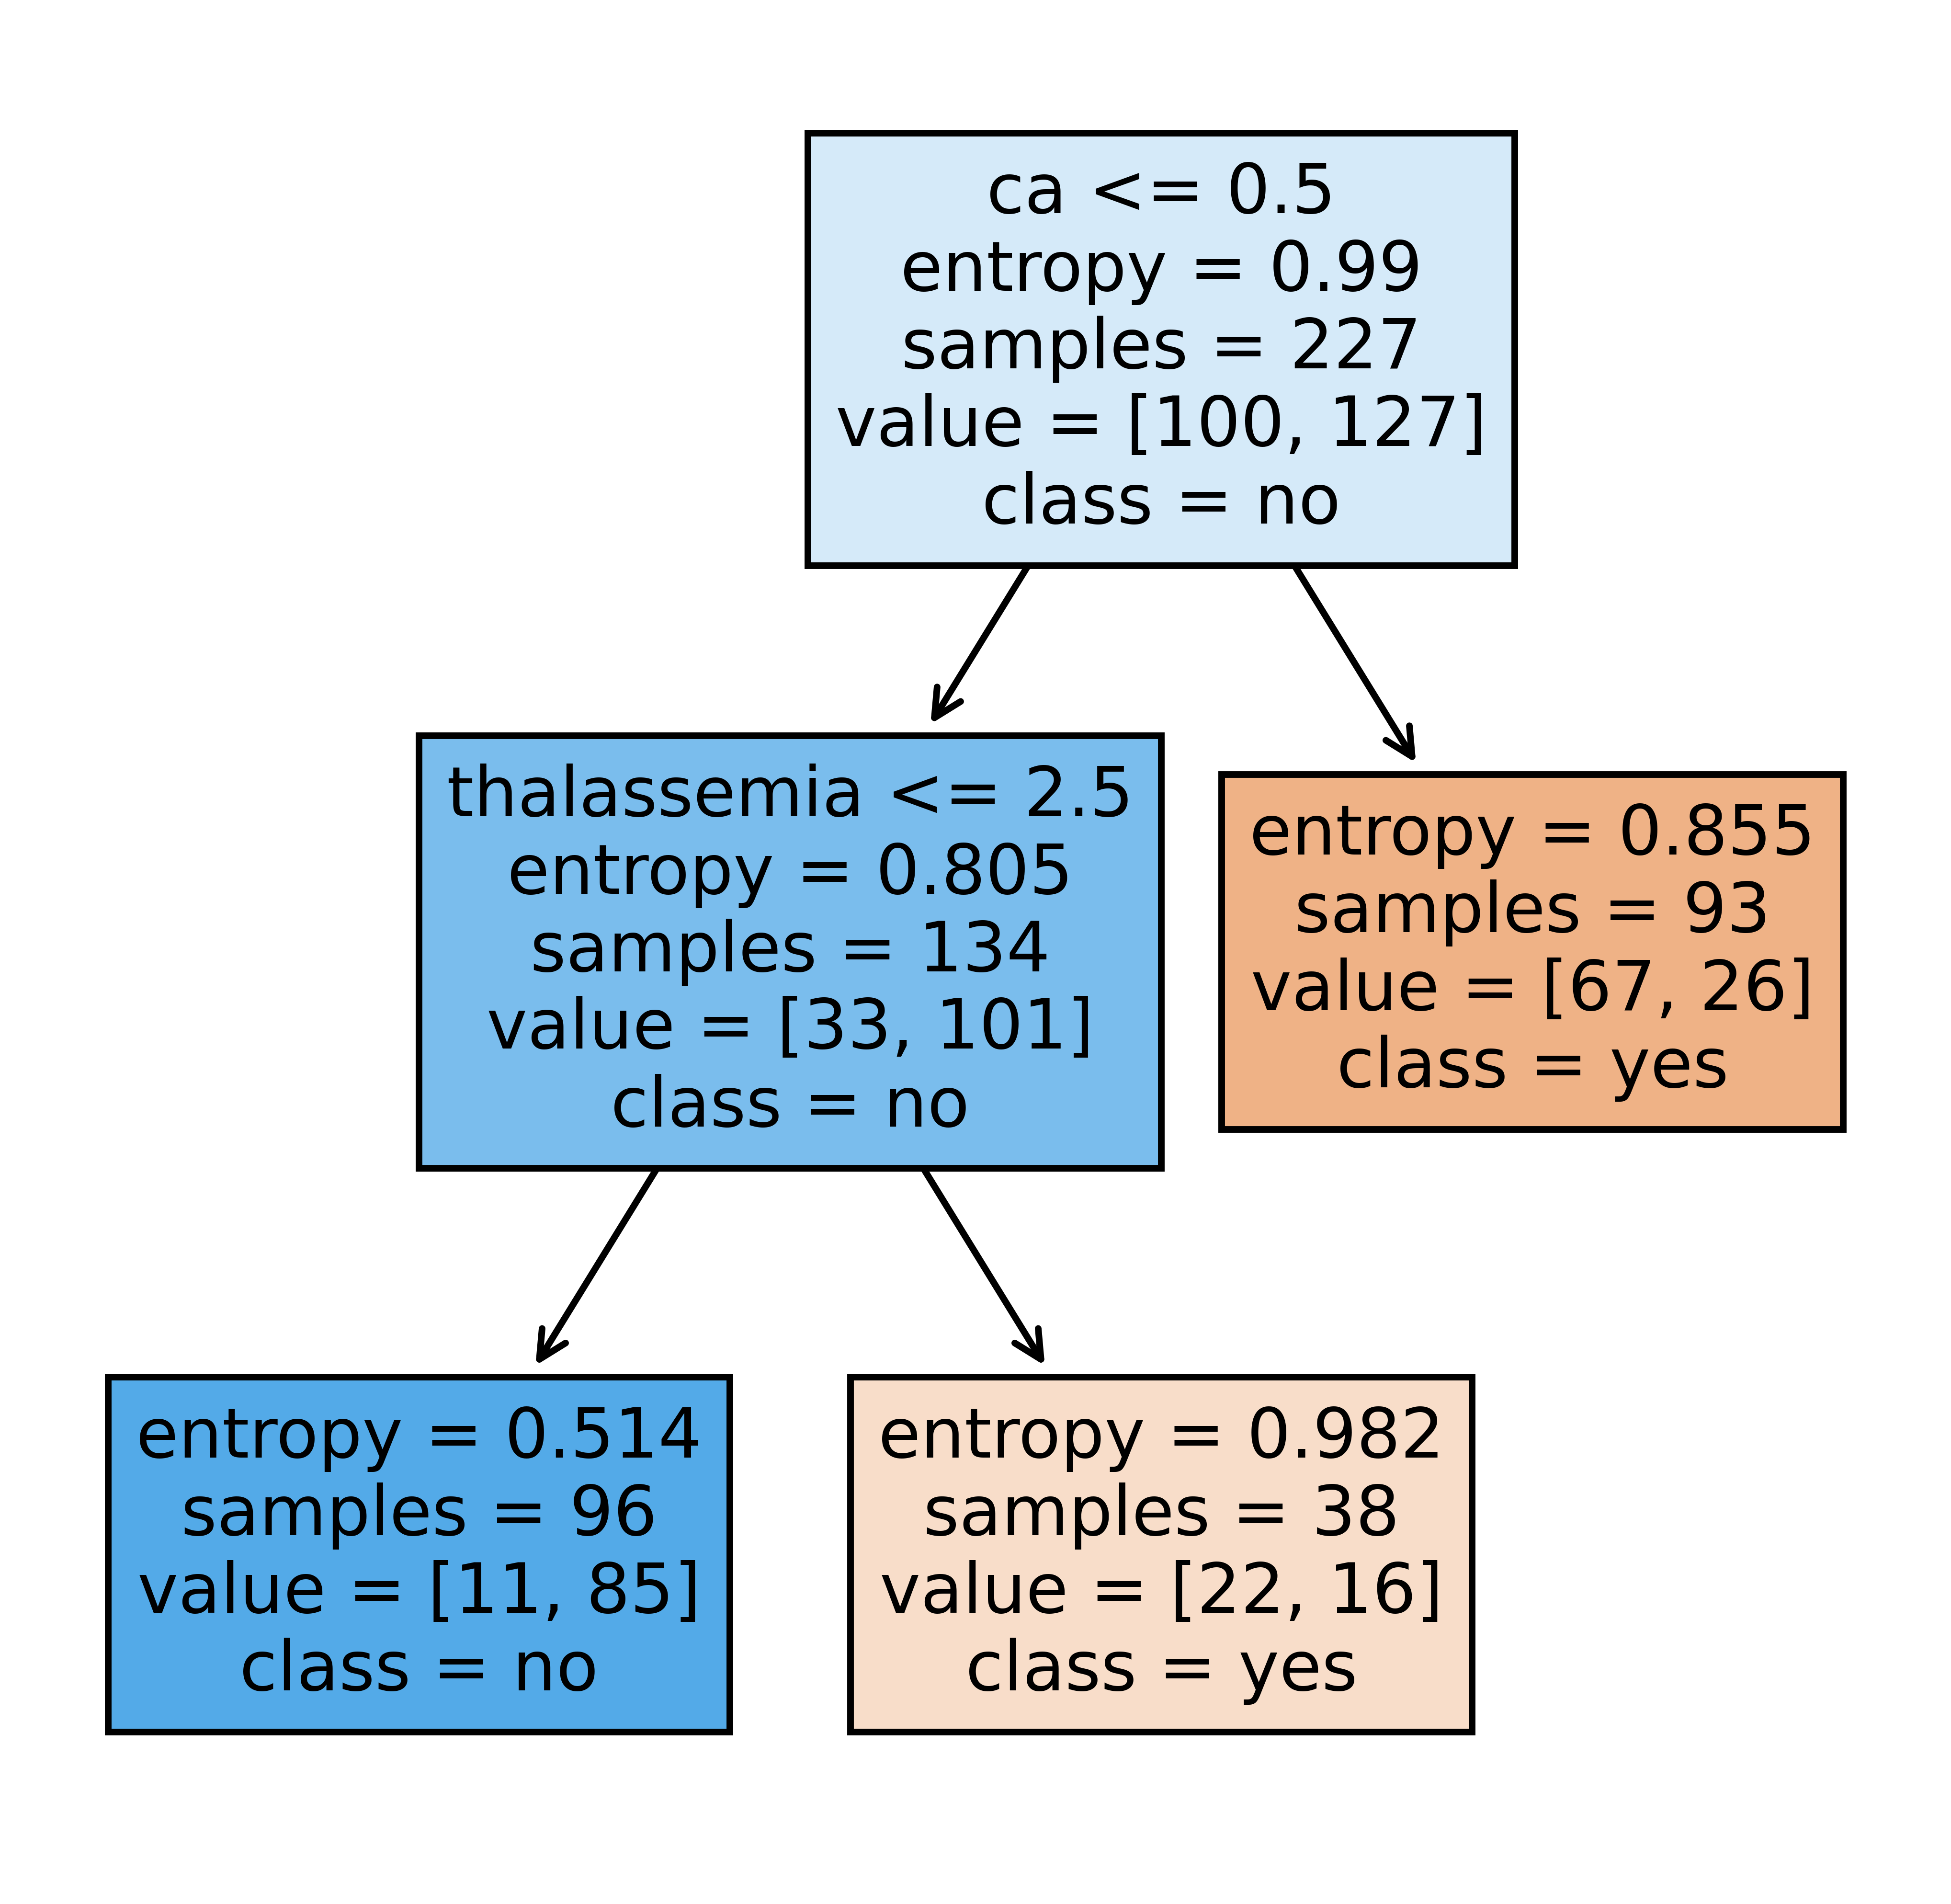

In [31]:
from sklearn.tree import plot_tree
from sklearn import tree
fn=x_train.columns
cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=1000)

dt_plot=plot_tree(dt2,
           feature_names = fn, 
           class_names=cn,
           filled = True);

In [32]:
# Now Applying Grid Search Method for better results
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[2,4,6,8,9,10,11,12],
              "min_samples_leaf":[2,5,10]
             }


tr = DecisionTreeClassifier()

gsearch = GridSearchCV(tr, parameters, cv=10, verbose=1, n_jobs=-1)
gsearch.fit(x_train, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=1)

In [33]:
from sklearn.model_selection import GridSearchCV

parmaters={'criterion':('gini','entropy'),
          'min_samples_split':[2,3,4,5], 
              'max_depth':[2,4,6,8,9,10,11,12],
              "min_samples_leaf":[2,5,10]
             }

tr=DecisionTreeClassifier()

gsearch=GridSearchCV(tr,parmaters,cv=10,verbose=1,n_jobs=-1)
gsearch.fit(x_train,y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=1)

In [34]:
gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [35]:
gsearch.best_score_

0.7527667984189723

In [37]:
dt3=DecisionTreeClassifier(max_depth=4, criterion="entropy", 
                            min_samples_split=3,
                           min_samples_leaf= 10)
gsearch.fit(x_train, y_train)

print("Train accuracy:", gsearch.score(x_train,y_train))

print("Test accuracy:", gsearch.score(x_test,y_test))


Fitting 10 folds for each of 192 candidates, totalling 1920 fits
Train accuracy: 0.8414096916299559
Test accuracy: 0.8421052631578947


In [38]:
cnf=pd.DataFrame(metrics.confusion_matrix(y_train,pred_train),columns=["Pred_0","Pred_1"])
cnf

,Pred_0,Pred_1
0,100,0
1,0,127


In [39]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       127

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



In [40]:
cnf=pd.DataFrame(metrics.confusion_matrix(y_test,pred_test),columns=["Pred_0","Pred_1"])
cnf

,Pred_0,Pred_1
0,32,6
1,11,27


In [41]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        38
           1       0.82      0.71      0.76        38

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.78      0.78      0.78        76



In [42]:
pd.DataFrame(gsearch.predict_proba(x_train),columns=["Prob_0","Prob_1"])

,Prob_0,Prob_1
0,1.000000,0.000000
1,0.437500,0.562500
2,0.083333,0.916667
3,0.000000,1.000000
4,0.000000,1.000000
...,...,...
222,0.230769,0.769231
223,0.000000,1.000000
224,0.000000,1.000000
225,0.600000,0.400000
